<a href="https://colab.research.google.com/github/vickywatson53/bioinfoRmatica/blob/main/M3_Victoria%20Campos_datosTabulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

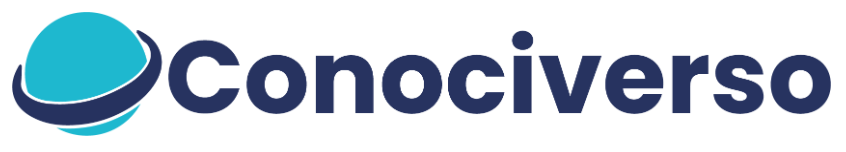


Carlos Alberto Peralta Alvarez 2025 | GPL3

Importación y exportación de archivos
Iteración
Operaciones estadísticas?
manipulación de datos tabulares

Cuaderno de trabajo3_Victoria Campos

## ☝ Navegación del directorio de trabajo

R tiene un directorio de trabajo default que cambia entre sistemas operativos, sin embargo para conocerlo y llegar a cambiarlo tenemos varias funciones que nos ayudan.

```
getwd() # Nos permite conocer el directorio de trabajo actual

setwd("path/al/directorio/deseado") # Cambia el directorio (Linux/Mac/COLAB)

# Cuando usamos Colab estamos usando Linux! 🐧

setwd("C:path\al\directorio") # Versión para Windows
```

Podemos listar los directorios o archivos del directorio actual (de trabajo) o de algun otro.

La manera mas sencilla es utilizar `list.files()`

```
list.files() # sin argumentos: lista los archivos y carpetas del directorio de trabajo.

list.files("path/al/directorio") # devuelve la información para el directorio solicitado, en Windows reemplazamos / por \
```

Otro comando útil es `list.dirs()` funciona de forma similar al anterior pero únicamente muestra carpetas (folders ó directorios) de forma recursiva e incluye aquellos que se encuentran ocultos.


## ☝ Importar datos a Colab

Seleccionaremos el ícono de los archivos

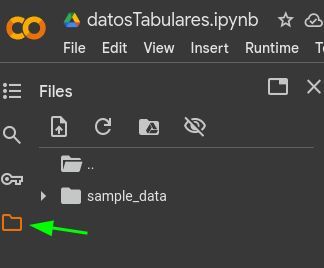

A continuación daremos click en subir archivos

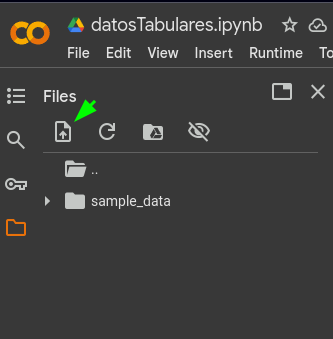

En nuestra computadora navegamos hasta los archivos de nuestro interés y los cargaremos.

**Es importante saber que es un almacenamiento temporal y que debemos respaldar todo lo que carguemos a Colab o creemos en Colab.**

Al concluir el proceso de subida, los archivos deben aparecer listados en el explorador

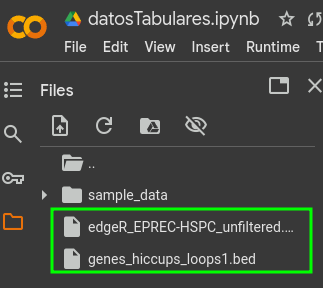


## ⏰ __Ejercicio__ Descarga de Github los datos de la carpeta _biodatos_ y súbelos a Colab

[Enlace](https://github.com/cperalta22/bioinfoRmatica/tree/main/biodatos) a los datos

Recuérda que hay que dar click en cada uno de los archivos

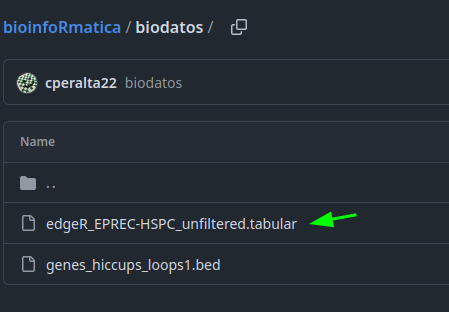

Y posteriormente en la página que se abre buscar el botón de descargas.

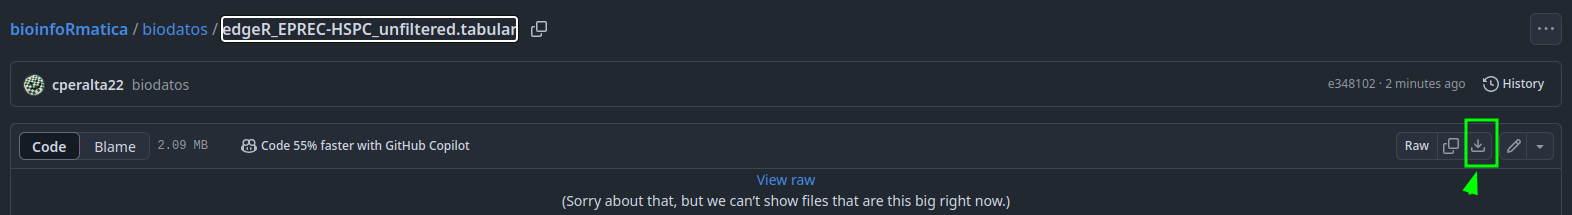

## ☝ Leer un archivo de texto

La forma más sencilla de leer un archivo es con `readLines()` nota la L mayúscula en el nombre de la función

`readLines("path/al/archivo")`

Si el archivo está en nuestro directorio de trabajo podemos leerlo sin especificar todo el path, simplemente por su nombre y extensión

```
readLines("genes_hiccups_loops1.bed")
```

Recuerda que siempre podemos usar otros vectores para facilitarnos la vida.

por otro lado la función `head()` nos permite ver únicamente la parte inicial de archivos muy grandes, para ver la parte final usamos `tail()`

```
readLines(list.files()[2]) |> head()
```



In [ ]:
list.files()

#readLines("genes_hiccups_loops1.bed")

#readLines(list.files()[2]) |> head()

## ☝ Archivos separados por delimitadores

En bioinformática usamos archivos en texto plano (no en Excel o Word), por que permite mantener su tamaño reducido y maximizar la compatibilidad.

Delimitadores mas frecuentes:

|Caracter|Nombre|Nombre genérico de los archivos|Extensión|
|:-:|:-:|:-:|:-:|
|,|Coma|Archivo separado por comas|.csv|
|\\t|Tabulador|Archivo separado por tabuladores|.tsv|
|;|Punto y coma _semicolon_||a veces .csv, pero varía|
|(varía)|Espacio en blanco||casi siempre .txt|

En bioinformática casi siempre serán los dos primeros por la facilidad para su uso.

Aunque no tienen las extensiones mencionadas, nuestros archivos de ejemplo están separados por comas (archivo con extensión .bed) y por tabuladores (archivo con extensión .tabular)

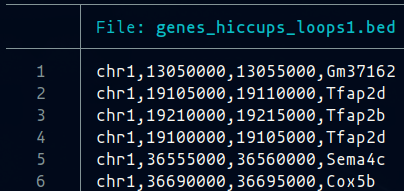

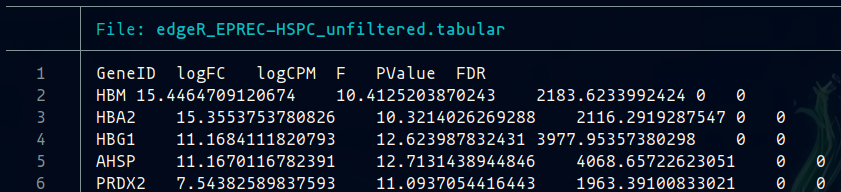

## 🤔 De excel a R (ó a Python)

*   Hay librerias que permiten la importación directa
*   Es más facil salvar como un CSV ó TSV en excel y abrir en R
*   Importante sólo guardar lo que nos interesa como tabla

Por ejemplo una hoja como esta:

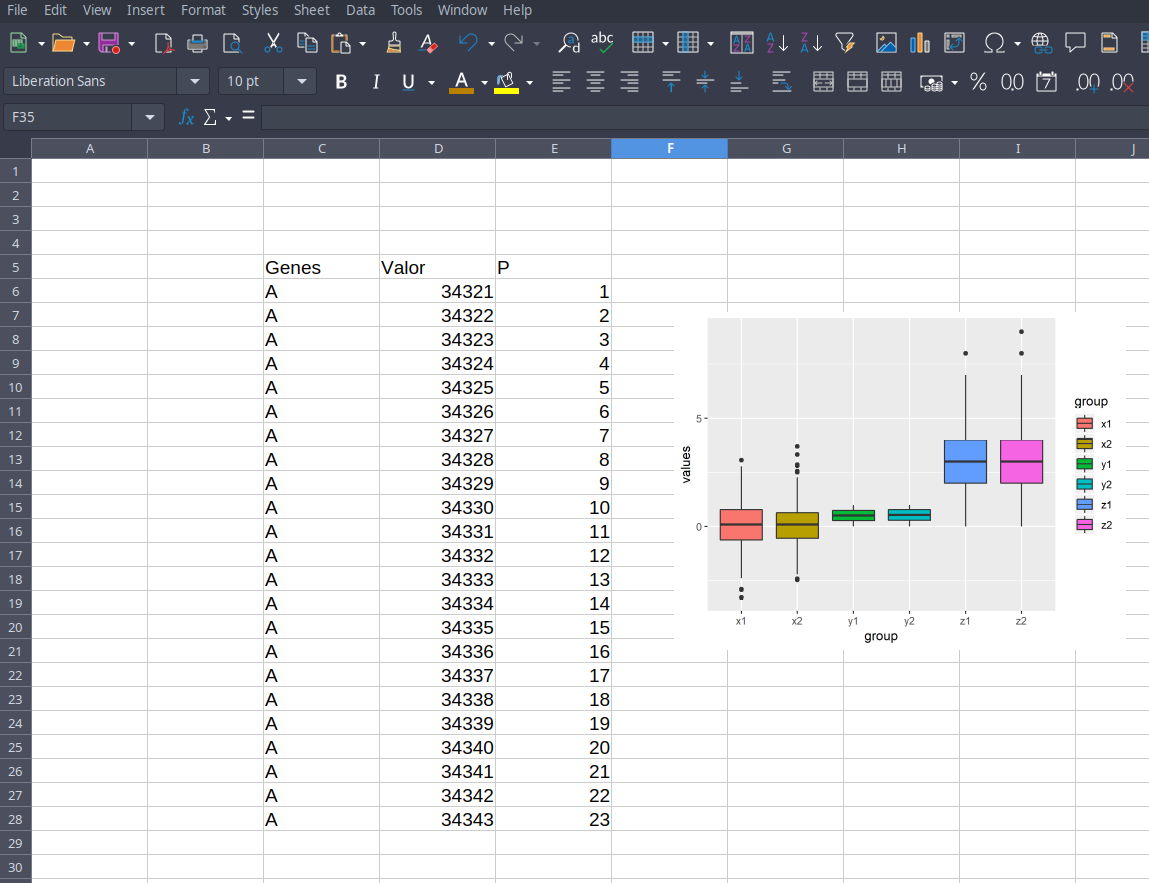

le quitaremos todo lo que sean imágenes y columnas y filas vacías . . .

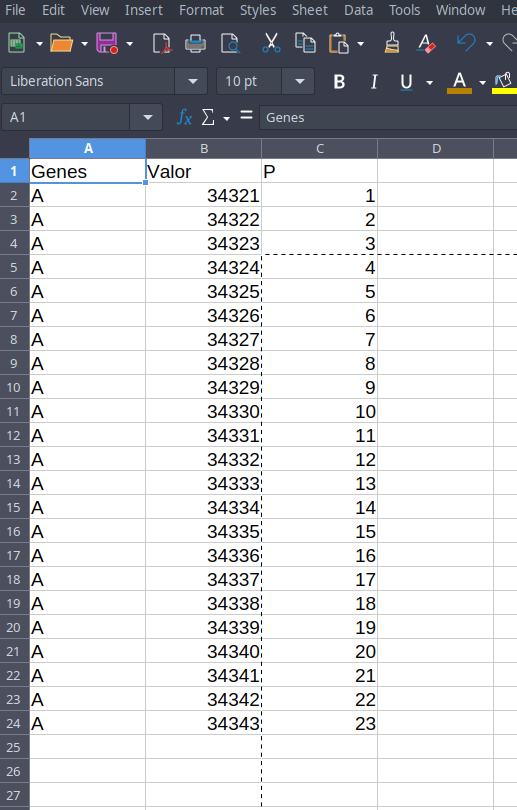

Nota cómo quedaron los datos en el extremo superiór izquierdo, entonces si los exportamos como CSV ó TSV



## ☝ El Tidyverse

Es una **colección** de librerias que mejoran la experiencia por defecto de R para:


*   Manejo de datos tabulares
*   Visualización de los datos
*   Manipulación de cadenas de texto


[ver más](https://es.wikipedia.org/wiki/Tidyverse)

Instalémoslo de una sóla vez con:

`install.packages('tidyverse')`

y lo cargamos en memoria con la función `library(tidyverse)`

💡 **Es muy importante tener en cuenta que todo lo relacionado al tidyverse utiliza con mucha frecuencia el entubamiento (`|>`) por lo que debemos estar preparados para utilizar esta forma de programar.**

In [ ]:
install.packages('tidyverse')

In [ ]:
library(tidyverse)

## ☝Importémos los datos como un par de data frames . . . quiero decir _tibbles_

El archivo con extensión .bed es un archivo separado por comas por lo que utilizaremos la función del __tidyverse__ `read_csv("genes_hiccups_loops1.bed")`

Es mucho más práctico asignar el resultado de esta operación a un nuevo objeto, este será un Tibble, en la práctica es indistinguible de un Data Frame.

Podemos explorar su contenido al usar algunas funciones útiles:

|Función|Acción|
|-|-|
|`head()` y `tail()`|Muestran los extremos superior e inferior respectivamente|
|`glimpse()`| Nos dá información útil sobre el contenido y tipo de datos de la tabla|
|`nrow()` y `ncol()`| Regresa el numero de filas y de columnas respectivamente |
|`rownames()` y `colnames()` | Regresa los nombres asociados filas y columnas |


Conociendo sin conocer el nombre de las filas o las columnas, podemos acceder a los datos con los corchetes cuadrados, pero conociendo los datos de los nombres nosotros podemos usar el caracter `$` para llamar a las columnas por su nombre.

In [ ]:
genes <- read_csv("genes_hiccups_loops1.bed")

glimpse(genes)

colnames(genes)

In [ ]:
genes <- read_csv("genes_hiccups_loops1.bed", col_names = F)

glimpse(genes)

colnames(genes)

In [ ]:
genes |> head()

genes$X1 |> head()

genes$X1 |> unique()

## ☝Reemplazemos los nombres de las columnas

Aqui es muy útil la función `colnames()` en conjunto con el operador de asignación `<-` y un vector del mismo tamaño que el número de columnas

Ejemplo:
```
colnames(genes) <- c("cromosoma","inicio","final", "nombre")
```

In [ ]:
colnames(genes) <- c("cromosoma","inicio", "final", "nombre")

glimpse(genes)

## ☝ Creación de nuevas columnas

La funcion `mutate()` nos ayuda en este aspecto.

Es una función del **tidyverse** y en este ecosistema de funciones siempre podemos usar el operador `|>` para pasar la salida de un primer comando a los sucesivos.

In [ ]:
genes2 <- genes |> mutate(regionSize = final-inicio)

head(genes2)

Puedo hacer mas de una columna a la vez

Aqui lo combinamos con una poderosa herramienta del tidyverse; la colección de funciones llamadas `stringr`

Dos de las funciones que usaremos frecuentemente en bioinformática es el eliminar partes de un texto o sustituirlo por otro, hagámoslo con`str_remove()` , `str_remove_all()`  , `str_replace()`  y `str_replace_all()`

In [ ]:
genes2 <- genes |>
  mutate(regionSize = final - inicio,chrNumber = str_remove(cromosoma, 'chr'), Cromosoma = str_replace(cromosoma, "chr", "Chr"))

head(genes2)

Obtener información relevante de la tabla es sencillo si usamos funciones para resumir, una muy sencilla es `table()`

In [ ]:
table(genes2$regionSize)

In [ ]:
table(genes2$nombre)

## ⏰ __Ejercicio__ Haz un resumen de las regiones por cromosoma

tip: usa `table()`

## ☝ Filtrar y seleccionar columnas de interés

`filter()` nos permite usar __comparaciones lógicas__ para seleccionar únicamente las filas de nuestro interés.

`select()` nos deja usar las columnas que necesitamos.

`arrange()` nos facilita ordenar los datos por una columna en particular

In [ ]:
genes3 <- genes2 |>
  filter(cromosoma == 'chr1') |>
  select(c(nombre,Cromosoma,inicio,final))

head(genes3)

In [ ]:
genes3 <- genes2 |>
  filter(cromosoma == 'chr1') |>
  select(c(nombre,final)) |>
  arrange(nombre,desc(final))

head(genes3)

Una forma mas sofisticada y que nos permite trabajar con la información resumida es usar las funciones `group_by()` y `summarise()` de manera combinada

In [ ]:
genes4 <- genes2 |> group_by(nombre) |> summarise(ocurrencias = n())

head(genes4)
nrow(genes4)

In [ ]:
genes4 <- genes2 |> group_by(nombre) |> summarise(ocurrencias = n()) |> filter(ocurrencias > 1)

head(genes4)
nrow(genes4)

## 🥳 __Ejercicio Final__

Encuentra los genes con expresión diferencial

El archivo __edgeR_EPREC-HSPC_unfiltered.tabular__ contiene datos sin filtrar de la comparación de dos muestras de RNA-Seq.

Lo que nos interesa es conocer los genes que cambiaron su expresión de manera significativa, es decir que su valor de expresión __aumentó o disminuyó__ en mas de logFC 1.5 ó menos de logFC -1.5.

Además para considerarlos estadísticamente significativos dichos genes deberán tener un FDR inferior a 0.01.

En el archivo hay columnas correspondientes tanto a __logFC__ cómo __FDR__

Debes cumplir con lo siguiente:

Filtrar la tabla para quedarte únicamente con los genes que se subexpresan o sobreexpresan de acuerdo a los criterios de arriba.

guardar en un vector, data frame o una versión filtrada del tibble los genes sobreexpresados y en otro objeto similar los subexpresados.

Suerte!



In [ ]:
expdif <- read_tsv("edgeR_EPREC-HSPC_unfiltered.tabular")

head(expdif)

glimpse(expdif)